# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import do CSV
df = pd.read_csv("sinasc_RO_2019.csv")

In [3]:


# reduzo pras colunas que vou usar

coluna_de_interesse = ['APGAR1', 'APGAR5', 'GESTACAO', 'PESO', 'SEXO']

df = df[coluna_de_interesse].copy()

df.head()

,APGAR1,APGAR5,GESTACAO,PESO,SEXO
0,9.0,10.0,37 a 41 semanas,3685,Masculino
1,8.0,9.0,37 a 41 semanas,3055,Feminino
2,8.0,10.0,37 a 41 semanas,3460,Feminino
3,9.0,10.0,37 a 41 semanas,2982,Feminino
4,8.0,10.0,37 a 41 semanas,3310,Feminino


In [4]:
df.tail()

,APGAR1,APGAR5,GESTACAO,PESO,SEXO
27023,8.0,9.0,32 a 36 semanas,2110,Masculino
27024,8.0,9.0,37 a 41 semanas,3310,Masculino
27025,9.0,10.0,37 a 41 semanas,3065,Masculino
27026,8.0,9.0,32 a 36 semanas,2352,Masculino
27027,7.0,8.0,37 a 41 semanas,4240,Masculino


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
df.loc[ df['APGAR5'] <= 3 , 'cat_APGAR5'] = 'asfixia grave'
df.loc[ df['APGAR5'] > 7 , 'cat_APGAR5'] = 'normal'

df.loc[ (df['APGAR5'] > 3) & (df['APGAR5'] <= 5) , 'cat_APGAR5' ] = 'asfixia moderada'
df.loc[ (df['APGAR5'] > 5) & (df['APGAR5'] <= 7) , 'cat_APGAR5' ] = 'asfixia leve'


df['cat_APGAR5'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: cat_APGAR5, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

COM BOXPLOT:

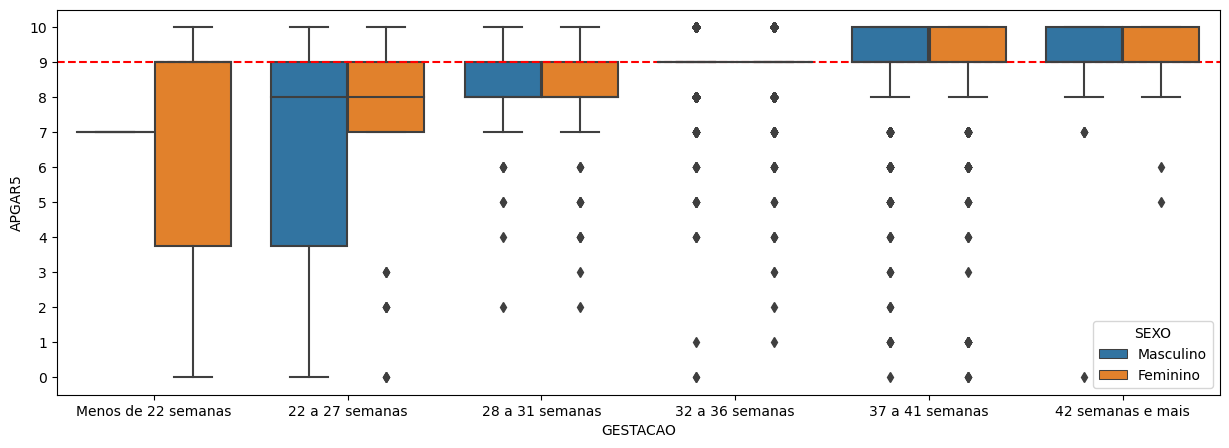

In [6]:
plt.close('all')

plt.rc('figure', figsize=(15, 5))

ax = sns.boxplot(data = df, 
                 y = 'APGAR5', x = 'GESTACAO', 
                 hue = 'SEXO', 
                 order=['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais'])

ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10])


mediana = df['APGAR5'].median()
ax.axhline(y = mediana, color = 'red', linestyle = '--')


plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
tab_cruzada = pd.crosstab(index = df['GESTACAO'], columns = df['APGAR5'])
tab_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
# divide cada valor da linha pela soma dos valores da linha

tab_freq = tab_cruzada.div(tab_cruzada.sum(axis=1), axis = 0)
tab_freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [9]:
tab_freq.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

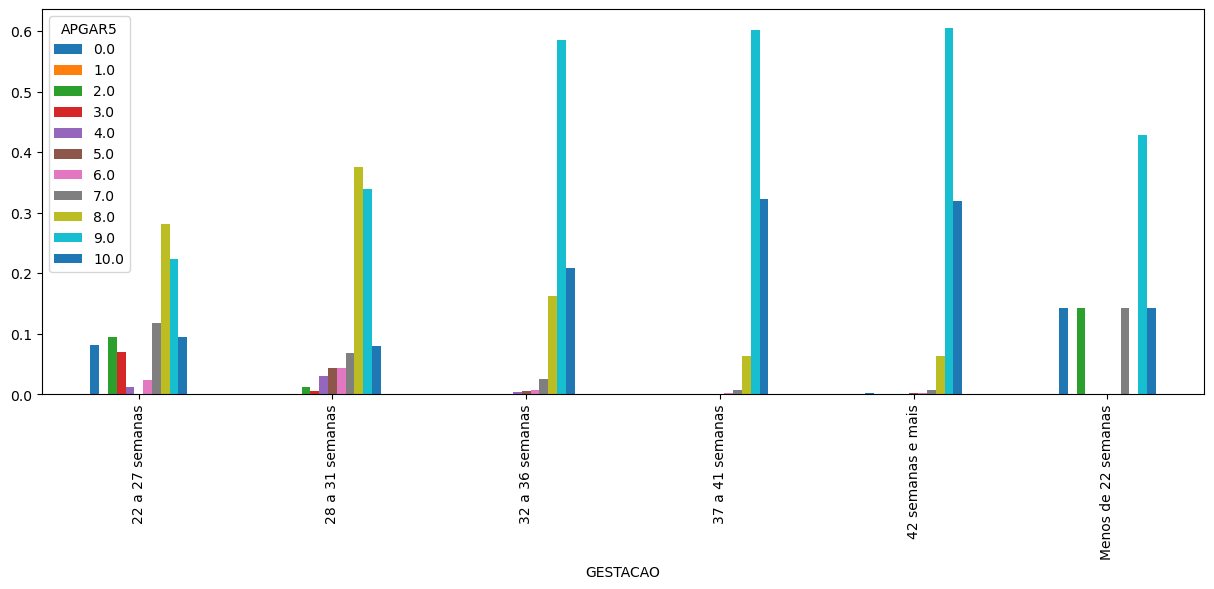

In [10]:
plt.close('all')

tab_freq.plot.bar()

plt.show()

# pode-se observar que a afirmação tem fundamento. Pois no gráfico nota-se que as gestações com menos de 37 semanas,
# são as que tem maiores proporções de APGAR5 menor do que 8

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Com os histogramas abaixo, pode-se a grande relaçao entre o APGAR5 e o peso dos bebês. 

No primeiro histograma, que abrange os bebês com todos os APGAR5, nota-se quase uma distribuição normal em que os pesos estão concentrados entre 2500g e 4000g. Além disso, é praticamente impossível visualizar o intervalo dos bebês com APGAR5 < 7.

No segundo histograma, onde foi filtrado apenas as observações com APGAR5 < 7, há muitos casos de APGAR5 < 7 concentrados com peso abaixo de 200g.

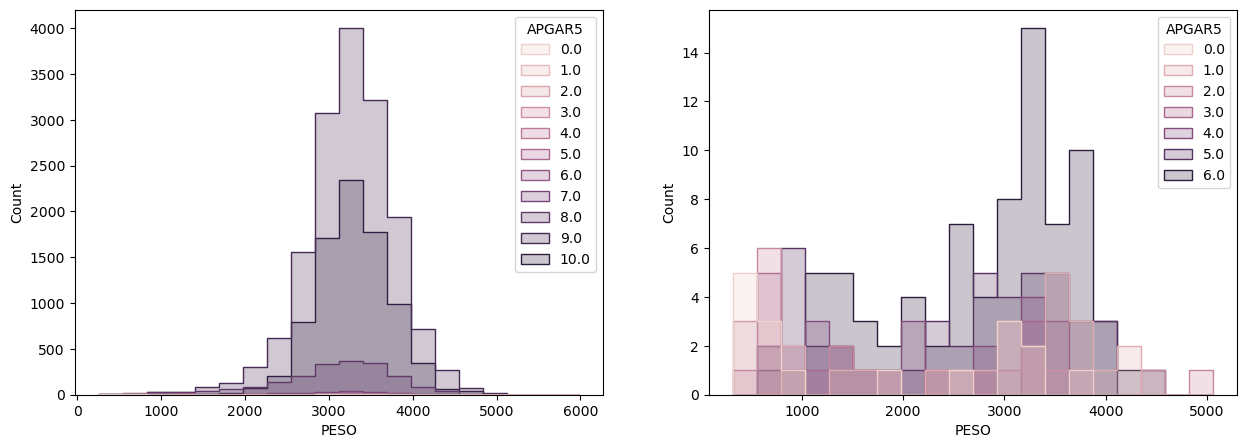

In [11]:
plt.close('all')

figura, axes = plt.subplots(1, 2)

# histograma com todos os APGAR5
sns.histplot(data = df, 
            x = 'PESO', 
            bins=20, hue = 'APGAR5', 
            element = 'step', ax = axes[0])


# histograma só com APGAR5 <= 6
sns.histplot(data = df[ df['APGAR5'] <= 6 ], 
            x = 'PESO', 
            bins=20, hue = 'APGAR5', 
            element = 'step', ax = axes[1])


plt.show()

E com os boxplot abaixo, pode-se observar que quanto maior o APGAR5, mais o peso se concentra no intervalo da mediana

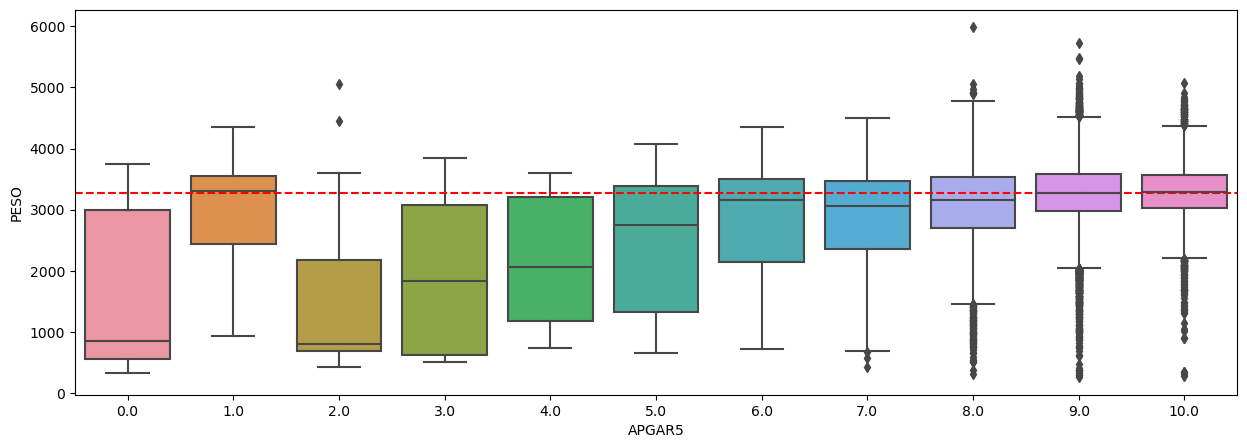

In [12]:
plt.close('all')

ax = sns.boxplot(data = df, y = 'PESO', x = 'APGAR5')

mediana = df['PESO'].median()

ax.axhline(y = mediana, color = 'red', linestyle = '--')

plt.show()